In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading file

In [42]:
df = pd.read_csv('D:\\Data analytics\\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [43]:
df.shape

(51717, 17)

# Reading and dropping unwanted columns

In [44]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [45]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list','listed_in(city)'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


# Dropping duplicate data

In [47]:
df.duplicated().sum()

16706

In [48]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [49]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

# cleaning rate column

In [50]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [51]:
value='2.0/5'
x=value.split("/")
x[0]

'2.0'

# Removing "NEW" ,  "-" and "/5" from Rate Column

In [ ]:
# def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    

In [92]:
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

In [93]:
df['rate'].unique()

array([3.73049074, 3.7       , 4.3       , 3.6       , 3.8       ,
       3.3       , 3.4       , 3.9       , 4.        , 4.1       ,
       3.2       , 3.5       , 3.1       , 2.9       , 3.        ,
       2.8       , 2.7       , 4.2       , 2.6       , 2.5       ,
       2.4       , 2.3       , 4.5       , 4.4       , 2.2       ,
       4.6       , 4.7       , 4.8       , 2.1       , 4.9       ,
       1.8       , 2.        ])

# Filling Null Values in Rate Column with Mean

In [55]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [56]:
df.isna().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [57]:
df.dropna(inplace = True)

In [58]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34636 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         34636 non-null  object 
 1   online_order                 34636 non-null  object 
 2   book_table                   34636 non-null  object 
 3   rate                         34636 non-null  float64
 4   votes                        34636 non-null  int64  
 5   location                     34636 non-null  object 
 6   rest_type                    34636 non-null  object 
 7   cuisines                     34636 non-null  object 
 8   approx_cost(for two people)  34636 non-null  object 
 9   listed_in(type)              34636 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ MB


# Data is Clean, Lets jump to Visualization

# count of various location

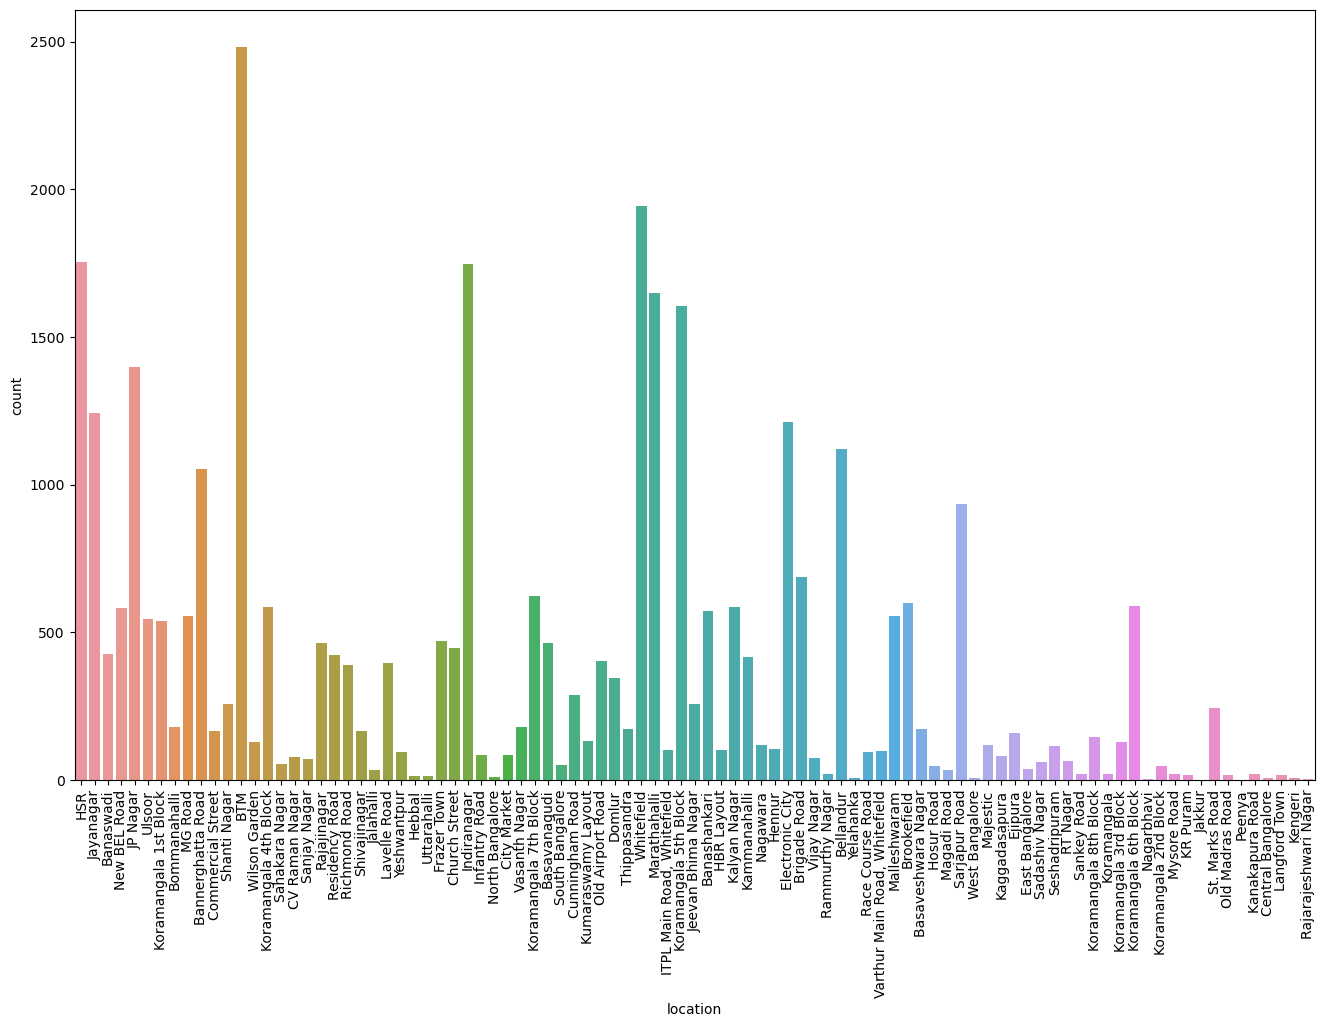

In [97]:
plt.figure(figsize = (16,10))
ax = sns.countplot(x=df.location)
plt.xticks(rotation=90)
plt.show()

# visualisation online order

<Axes: xlabel='online_order', ylabel='count'>

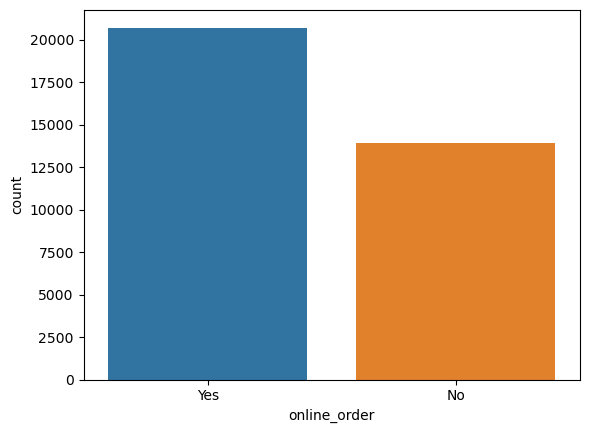

In [60]:
sns.countplot(x=df.online_order)

# visualisaton book table

<Axes: xlabel='book_table', ylabel='count'>

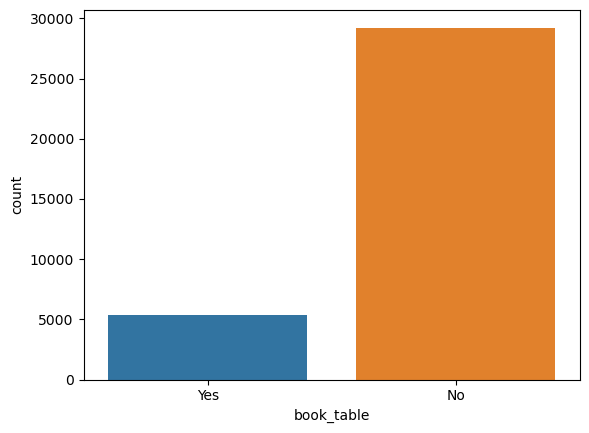

In [61]:
sns.countplot(x=df.book_table)

# Visualizing Types of Restaurents vs Rate

<Axes: xlabel='listed_in(type)', ylabel='rate'>

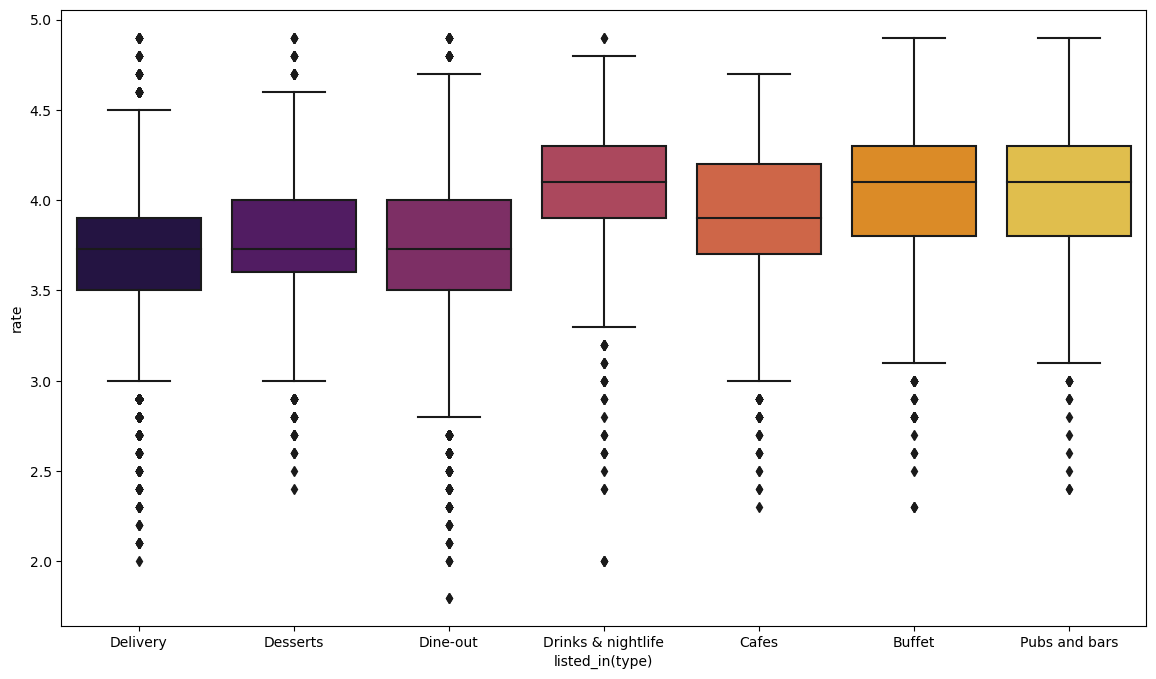

In [105]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'listed_in(type)' , y = 'rate', data = df, palette = 'inferno')

# location wise votes

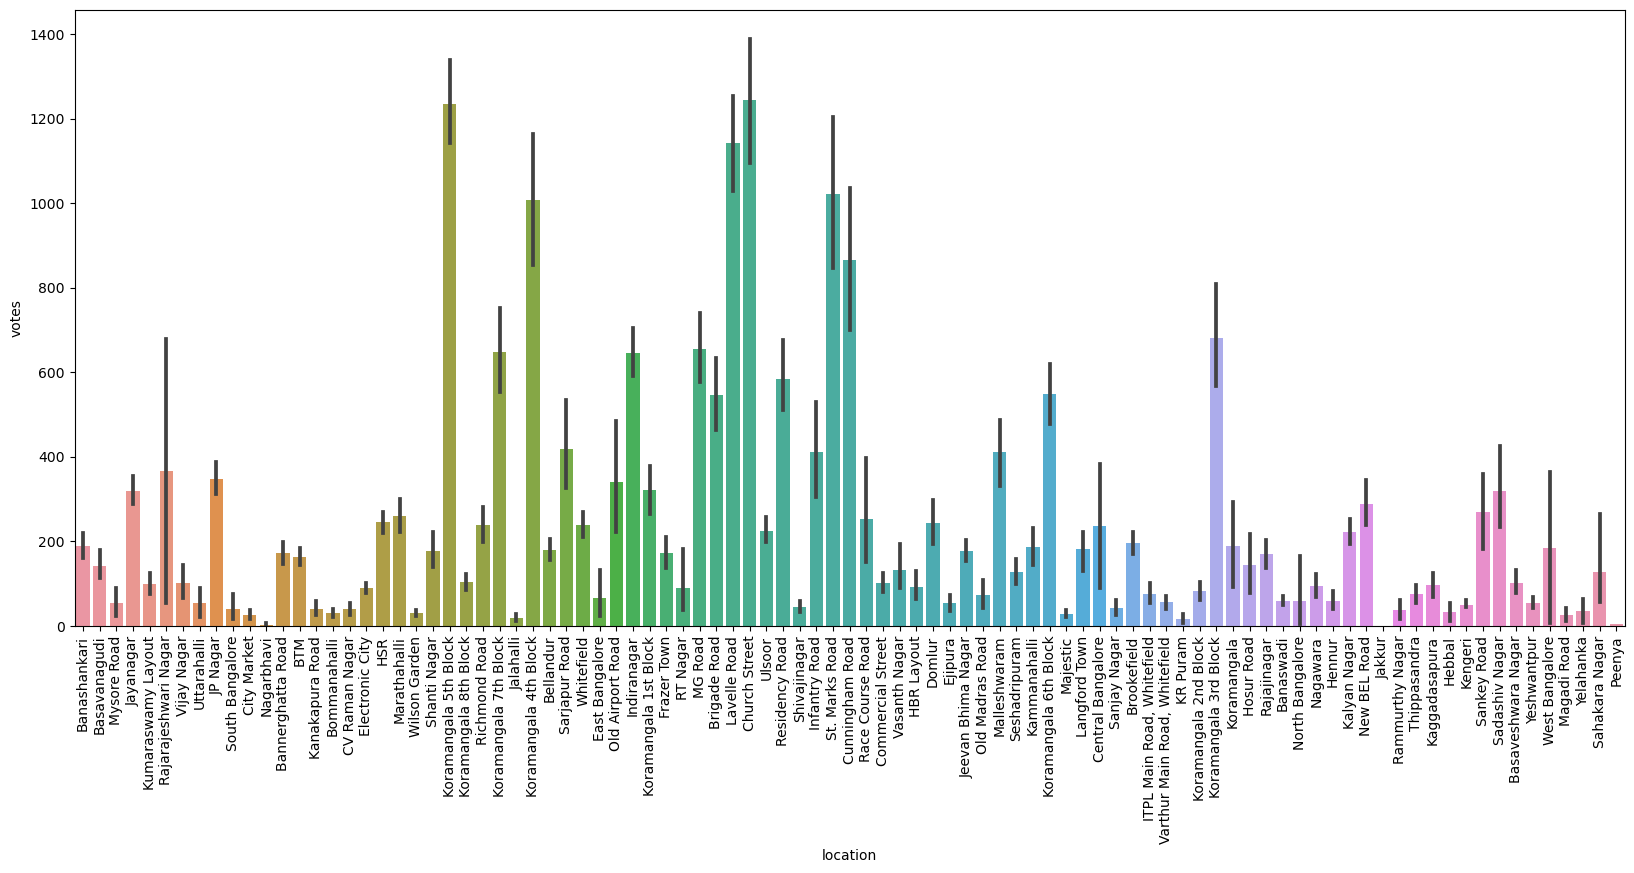

In [73]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'location', y = 'votes', data = df)
plt.xticks(rotation = 90)
plt.show()

# no.of count in online_order

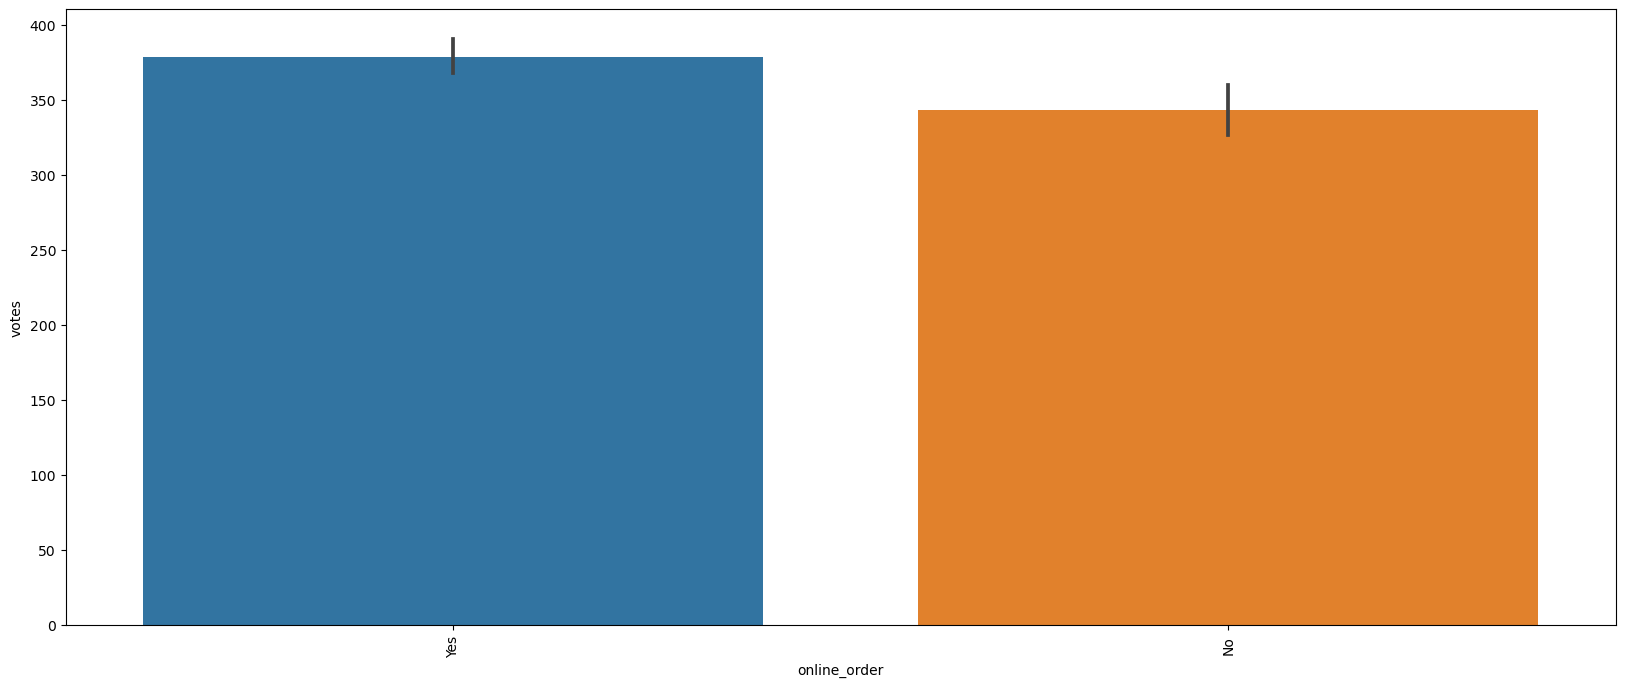

In [91]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'online_order', y = 'votes', data = df)
plt.xticks(rotation = 90)
plt.show()